In [28]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse=pd.read_csv(mouse_drug_data_to_load)
df_clinical=pd.read_csv(clinical_trial_data_to_load)
df_clinical.head()
# Combine the data into a single dataset
df=df_mouse.merge(df_clinical)
# Display the data table for preview
df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [29]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupedby_drug_time=df.groupby(["Drug","Timepoint"]).mean()
data_volume=groupedby_drug_time["Tumor Volume (mm3)"]
# Convert to DataFrame
df_drug_time=pd.DataFrame(data_volume).reset_index()
# Preview DataFrame
df_drug_time.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [30]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
groupedby_drug_time_std=df.groupby(["Drug","Timepoint"]).sem()
data_volume_std=groupedby_drug_time_std["Tumor Volume (mm3)"]
# Convert to DataFrame
df_drug_time_std=pd.DataFrame(data_volume_std).reset_index()
# Preview DataFrame
df_drug_time_std.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [31]:
# Minor Data Munging to Re-Format the Data Frames
re_format_data=df_drug_time.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
# Preview that Reformatting worked
re_format_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [32]:
df_re=re_format_data.reset_index()
df_re

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [33]:
re_df_drug_time_std=df_drug_time_std.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
df_re_std=re_df_drug_time_std.reset_index()
df_re_std

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
5,25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
6,30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
7,35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
8,40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515
9,45,1.223977,0.902358,1.144427,1.453186,1.416363,1.351726,1.888586,1.226805,1.576556,1.003576


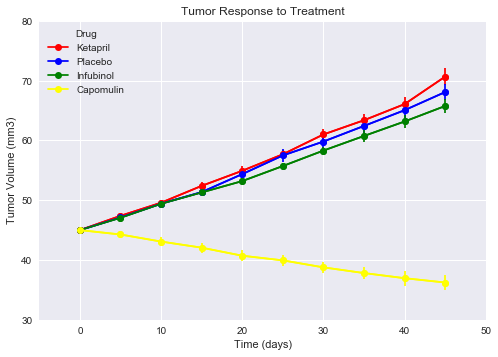

In [34]:
# Generate the Plot (with Error Bars)
#ax=sns.scatterplot(x="Timepoint",y="Capomulin",data=df_re,)
plt.style.use('seaborn')
ax=df_re.plot(x="Timepoint",y=["Ketapril","Placebo","Infubinol","Capomulin"], marker='o',
           color=["red","blue","green","yellow"],grid=True,title='Tumor Response to Treatment')
ax.set_xlabel("Time (days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlim(-5,50)
ax.set_ylim(30,80)
yerr_keta = df_re_std["Ketapril"]
yerr_plac = df_re_std["Placebo"]
yerr_infu = df_re_std["Infubinol"]
yerr_capo = df_re_std["Capomulin"]
plt.errorbar(x = df_re["Timepoint"], y = df_re["Ketapril"],yerr = yerr_keta,color='red', fmt='-o')
plt.errorbar(x = df_re["Timepoint"], y = df_re["Placebo"], yerr = yerr_plac,color='blue', fmt='-o')
plt.errorbar(x = df_re["Timepoint"], y = df_re["Infubinol"], yerr = yerr_infu,color='green', fmt='-o')
plt.errorbar(x = df_re["Timepoint"], y = df_re["Capomulin"], yerr = yerr_capo,color='yellow', fmt='-o')

# Save the Figure
plt.savefig("TumerResponseToTreatment.png")
# Show the Figure
plt.show()


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [35]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
groupedby_drug_time_Met=df.groupby(["Drug","Timepoint"]).mean()
data_Met=groupedby_drug_time_Met["Metastatic Sites"]
# Convert to DataFrame and re-format
df_drug_time_Met=pd.DataFrame(data_Met).reset_index()
# Preview DataFrame
df_drug_time_Met.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [36]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
groupedby_drug_time_Met=df.groupby(["Drug","Timepoint"]).sem()
data_Sem=groupedby_drug_time_Met["Metastatic Sites"]
# Convert to DataFrame and re-format
df_drug_time_Sem=pd.DataFrame(data_Sem).reset_index()
# Preview DataFrame
df_drug_time_Sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [37]:
df_1=df_drug_time_Met.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
df_1=df_1.reset_index()
df_1

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
5,25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
6,30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
7,35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
8,40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


In [38]:
df_2=df_drug_time_Sem.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
df_2=df_2.reset_index()
df_2

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
5,25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
6,30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
7,35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
8,40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791
9,45,0.202591,0.286101,0.309320,0.278722,0.351104,0.304240,0.428571,0.190221,0.359062,0.286400


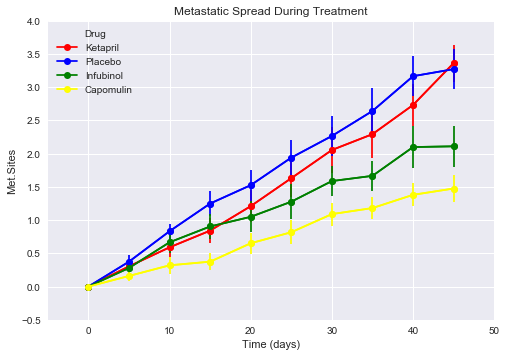

In [48]:
# Generate the Plot (with Error Bars) and show the Figure
ax=df_1.plot(x="Timepoint",y=["Ketapril","Placebo","Infubinol","Capomulin"], marker='o'
             ,grid=True,title='Metastatic Spread During Treatment',color=["red","blue","green","yellow"])
ax.set_xlabel("Time (days)")
ax.set_ylabel("Met.Sites")
ax.set_xlim(-5,50)
ax.set_ylim(-0.5,4)

yerr_keta = df_2["Ketapril"]
yerr_plac = df_2["Placebo"]
yerr_infu = df_2["Infubinol"]
yerr_capo = df_2["Capomulin"]
plt.errorbar(x = df_1["Timepoint"], y = df_1["Ketapril"], yerr = yerr_keta, color="red", fmt='-o')
plt.errorbar(x = df_1["Timepoint"], y = df_1["Placebo"], yerr = yerr_plac, color="blue", fmt='-o')
plt.errorbar(x = df_1["Timepoint"], y = df_1["Infubinol"], yerr = yerr_infu,color="green", fmt='-o')
plt.errorbar(x = df_1["Timepoint"], y = df_1["Capomulin"], yerr = yerr_capo,color="yellow", fmt='-o')

# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")
# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [40]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
groupedby_drug_time_count=df.groupby(["Drug","Timepoint"]).count()
data_mouse=groupedby_drug_time_count["Mouse ID"]
# Convert to DataFrame
df_mouse=pd.DataFrame(data_mouse).reset_index()
# Preview DataFrame
df_mouse.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [41]:
re_df_mouse=df_mouse.pivot(index="Timepoint",columns="Drug",values="Mouse ID")
re_df_mouse

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [42]:
df_re_mouse=re_df_mouse.reset_index()
df_re_mouse

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


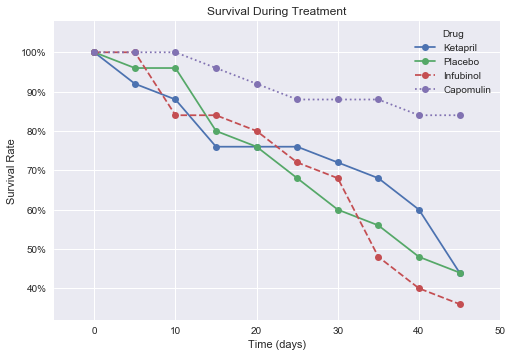

In [43]:
import matplotlib.ticker as ticker
# Generate the Plot (Accounting for percentages)
ax=df_re_mouse.plot(x="Timepoint",y=["Ketapril","Placebo","Infubinol","Capomulin"], marker='o',
              style=['+-','o-','.--','s:'],grid=True,title='Survival During Treatment')
ax.set_xlabel("Time (days)")
ax.set_ylabel("Survival Rate")
ax.set_xlim(-5,50)
ax.set_ylim(8,27)
vals = ax.get_yticks()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=25))


# Save the Figure
plt.savefig("SurvivalDuringTreatment.png")

# Show the Figure
plt.show()



![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [44]:
# Calculate the percent changes for each drug
df_pct=df_re.pct_change(periods=9)
# Display the data to confirm
df_pct_clean=df_pct.dropna()*100
df_pct_clean.reset_index(drop=True,inplace=True)
df_pct_clean=df_pct_clean.drop(columns="Timepoint")
df_pct_clean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,-19.475303,42.516492,46.123472,57.028795,53.923347,51.29796,47.241175,-22.3209,52.085134,46.579751


In [45]:
df_pct_clean=df_pct_clean[["Capomulin","Infubinol","Ketapril","Placebo"]]
names=["Capomulin","Infubinol","Ketapril","Placebo"]
values=df_pct_clean.values[0]
values=list(values)
values=values

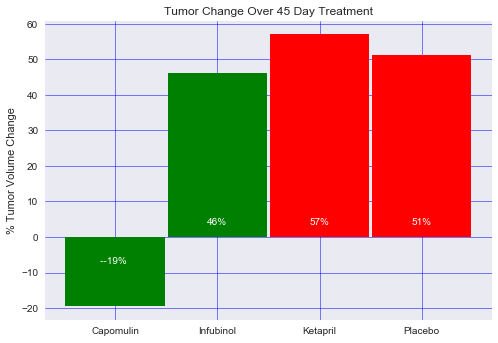

In [46]:

x = np.arange(len(values))  # the label locations
width = 0.97# the width of the bars

colors  =  ['red'  if  val  >  0  else  'green' for val in values]

fig, ax = plt.subplots()
rect_Pass = ax.bar(x[0], values[0], width, color=colors)
rect_Fail = ax.bar(x[1:], values[1:], width, color=colors)

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(x)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.grid(linestyle='-', linewidth='0.5', color='blue')

# Use functions to label the percentages of changes
def autolabel_Fail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")
        
def autolabel_Pass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")
        
# Call functions to implement the function calls
autolabel_Pass(rect_Pass)
autolabel_Fail(rect_Fail)

# Save the Figure
plt.savefig("TumorChangeOver45DayTreatment.png")
# Show the Figure
fig.show()



![Metastatic Spread During Treatment](../Images/change.png)

In [47]:
pwd

'C:\\Users\\16478\\Desktop\\Unit 5 - Matplotlib\\Homework\\Instructions\\Pymaceuticals'